# *Matrix.py*

In [ ]:
import random
import math

# Funciones básicas para vectores y matrices (antes en matrix.py)

def vector_add(v, w):
    """Suma dos vectores."""
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_sub(v, w):
    """Resta dos vectores."""
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """Multiplica un vector por un escalar."""
    return [c * v_i for v_i in v]

# Clase de red neuronal simple (ANN)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de pesos aleatorios para dos capas
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(input_size)] for _ in range(hidden_size)]
        self.weights_hidden_output = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(output_size)]

        # Bias para cada neurona (inicializados en 0)
        self.bias_hidden = [0.0 for _ in range(hidden_size)]
        self.bias_output = [0.0 for _ in range(output_size)]

        self.learning_rate = 0.1

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, inputs):
        # Capa oculta
        hidden_layer_input = []
        for i in range(len(self.weights_input_hidden)):
            weighted_sum = sum(w * inp for w, inp in zip(self.weights_input_hidden[i], inputs)) + self.bias_hidden[i]
            hidden_layer_input.append(self.sigmoid(weighted_sum))

        # Capa de salida
        output_layer_input = []
        for i in range(len(self.weights_hidden_output)):
            weighted_sum = sum(w * h for w, h in zip(self.weights_hidden_output[i], hidden_layer_input)) + self.bias_output[i]
            output_layer_input.append(self.sigmoid(weighted_sum))

        return hidden_layer_input, output_layer_input

    def train(self, training_data, epochs=1000):
        for epoch in range(epochs):
            total_loss = 0
            for inputs, targets in training_data:
                # Paso forward
                hidden_outputs, predicted_outputs = self.feedforward(inputs)

                # Calcula error de salida
                output_errors = vector_sub(targets, predicted_outputs)
                total_loss += sum(e**2 for e in output_errors) / len(output_errors)

                # Calcula delta para la capa de salida
                delta_output = [error * self.sigmoid_derivative(output) for error, output in zip(output_errors, predicted_outputs)]

                # Calcula error de capa oculta
                hidden_errors = []
                for i in range(len(self.weights_input_hidden)):
                    error = sum(self.weights_hidden_output[j][i] * delta_output[j] for j in range(len(delta_output)))
                    hidden_errors.append(error)

                # Calcula delta para la capa oculta
                delta_hidden = [error * self.sigmoid_derivative(h) for error, h in zip(hidden_errors, hidden_outputs)]

                # Actualiza pesos de capa salida
                for i in range(len(self.weights_hidden_output)):
                    for j in range(len(self.weights_hidden_output[i])):
                        self.weights_hidden_output[i][j] += self.learning_rate * delta_output[i] * hidden_outputs[j]

                # Actualiza biases de salida
                for i in range(len(self.bias_output)):
                    self.bias_output[i] += self.learning_rate * delta_output[i]

                # Actualiza pesos de capa oculta
                for i in range(len(self.weights_input_hidden)):
                    for j in range(len(self.weights_input_hidden[i])):
                        self.weights_input_hidden[i][j] += self.learning_rate * delta_hidden[i] * inputs[j]

                # Actualiza biases de capa oculta
                for i in range(len(self.bias_hidden)):
                    self.bias_hidden[i] += self.learning_rate * delta_hidden[i]

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch +1}, Loss: {total_loss / len(training_data):.6f}")

# Tus datos de entrenamiento

datos_entrenamiento = [
    ([1.32, 0], [1.2]),
    ([1.96, 0], [1.35]),
    ([2.06, 0], [1.37]),
    ([2.11, 0], [2.06]),
    ([2.06, 0], [1.88]),
    ([1.96, 0], [1.62]),
    ([1.32, 0], [1.52]),
    ([1.32, 2], [1.1]),
    ([1.96, 2], [1.28]),
    ([2.06, 2], [1.55]),
    ([2.11, 2], [2.32]),
    ([2.06, 2], [2.4]),
    ([1.96, 2], [1.9]),
    ([1.32, 2], [1.5]),
    ([1.32, 4], [1.0]),
    ([1.96, 4], [1.21]),
    ([2.06, 4], [1.5]),
    ([2.11, 4], [2.58]),
    ([2.06, 4], [2.63]),
    ([1.96, 4], [2.02]),
]

# Crea y entrena la red

red = NeuralNetwork(input_size=2, hidden_size=5, output_size=1)
red.train(datos_entrenamiento, epochs=1000)

# Prueba con un dato nuevo

entrada_prueba = [1.5, 2]
_, salida_prueba = red.feedforward(entrada_prueba)
print(f"Para la entrada {entrada_prueba}, la red predice: {salida_prueba}")


Epoch 100, Loss: 0.727932
Epoch 200, Loss: 0.726278
Epoch 300, Loss: 0.725732
Epoch 400, Loss: 0.725461
Epoch 500, Loss: 0.725299
Epoch 600, Loss: 0.725191
Epoch 700, Loss: 0.725115
Epoch 800, Loss: 0.725057
Epoch 900, Loss: 0.725013
Epoch 1000, Loss: 0.724977
Para la entrada [1.5, 2], la red predice: [0.9998047340639945]




# Datos de entrenamiento:

Los datos vienen en pares:

*Entrada:*


 [x, y] donde x es la posición horizontal (columna) y y es la posición vertical (fila × 2 mm).

*Salida esperada:*

[voltaje] es el valor medido de voltaje en esa posición.

Por ejemplo:


([1.32, 0], [1.2])

significa que en la posición horizontal 1.32 y vertical 0, el voltaje medido fue 1.2.

# Arquitectura de la red neuronal:



Creamos una red neuronal artificial (ANN) con:

* 2 neuronas en la capa de entrada (porque tus datos tienen 2 valores: x y y).

* 5 neuronas en una capa oculta, que permite que la red aprenda patrones no lineales.

* 1 neurona en la capa de salida que predice el voltaje.



# Funciones matemáticas:

Sigmoide:

 Es una función que convierte cualquier número en un valor entre 0 y 1, útil para que la red aprenda patrones suavizados y pueda calcular gradientes para actualizar sus pesos.



*Derivada de sigmoide:*


*Para calcular cómo cambiar los pesos durante el entrenamiento (gradiente descendente).



*Entrenamiento:*


La red pasa por todos tus datos muchas veces (1000 épocas en este caso).
En cada pasada:



*Feedforward:* Se calculan las salidas estimadas para las entradas dadas.


*Cálculo de error:* Se compara la salida estimada con el voltaje real (target).

*Backpropagation:* El error se usa para ajustar los pesos y biases de la red, tratando de minimizar la diferencia.


Este ciclo se repite para que la red aprenda poco a poco.



# Explicación de los resultados

*Loss (pérdida): *

Es una medida de qué tan lejos están las predicciones de la red respecto a los valores reales.

* Al principio era ~0.73 y bajó muy lentamente hasta ~0.72, lo que indica que la red está aprendiendo, pero no mucho.

* Eso puede pasar porque el dataset es pequeño y los valores pueden tener poco rango o ruido.

* Predicción para [1.5, 2]: La red predice aproximadamente 0.9998.

* Esto significa que para la posición horizontal 1.5 y vertical 2 (que no estaba en los datos de entrenamiento), la red estima un voltaje cercano a 1.0.

* La salida está en rango de 0 a 1 porque usamos función sigmoide en la capa final, por eso la predicción está "normalizada".

# ¿Por qué normalizar los datos?

Los datos que tenemos  de posición x y y están en rangos distintos y el voltaje en otro rango diferente.

Si no normalizamos, la red puede tener problemas para aprender porque algunos valores “pesan” más que otros.

Normalizar significa ajustar los datos para que estén en un rango común (por ejemplo, entre 0 y 1).

Esto ayuda a que el aprendizaje sea más rápido y estable.

Cómo vamos a normalizar


*Para estos datos seleccionados :*

Para cada conjunto (x, y) tomamos el mínimo y máximo para x y para y.

Luego escalamos cada dato así:

𝑥
𝑛
𝑜
𝑟
𝑚
=
𝑥
−
𝑥
𝑚
𝑖
𝑛
𝑥
𝑚
𝑎
𝑥
−
𝑥
𝑚
𝑖
𝑛
x
norm
​
 =
x
max
​
 −x
min
​

x−x
min
​

​

y lo mismo para y.


Para el voltaje, también hacemos lo mismo con el rango de voltajes que hemos seleccionado.


In [ ]:
import random
import math

# Funciones para la red neuronal
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def vector_add(a, b):
    return [x + y for x, y in zip(a, b)]

def vector_sub(a, b):
    return [x - y for x, y in zip(a, b)]

def scalar_multiply(scalar, vector):
    return [scalar * x for x in vector]

def dot_product(a, b):
    return sum(x * y for x, y in zip(a, b))

# Tus datos originales
datos = [
    ([1.32, 0], [1.2]),
    ([1.96, 0], [1.35]),
    ([2.06, 0], [1.37]),
    ([2.11, 0], [2.06]),
    ([2.06, 0], [1.88]),
    ([1.96, 0], [1.62]),
    ([1.32, 0], [1.52]),
    ([1.32, 2], [1.1]),
    ([1.96, 2], [1.28]),
    ([2.06, 2], [1.55]),
    ([2.11, 2], [2.32]),
    ([2.06, 2], [2.4]),
    ([1.96, 2], [1.9]),
    ([1.32, 2], [1.5]),
    ([1.32, 4], [1.0]),
    ([1.96, 4], [1.21]),
    ([2.06, 4], [1.5]),
    ([2.11, 4], [2.58]),
    ([2.06, 4], [2.63]),
    ([1.96, 4], [2.02]),
]

# Extraemos listas de x, y y voltajes para normalizar
xs = [d[0][0] for d in datos]
ys = [d[0][1] for d in datos]
voltajes = [d[1][0] for d in datos]

x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)
v_min, v_max = min(voltajes), max(voltajes)

def normalizar(val, val_min, val_max):
    return (val - val_min) / (val_max - val_min)

def desnormalizar(val_norm, val_min, val_max):
    return val_norm * (val_max - val_min) + val_min

# Normalizamos todo el dataset
datos_normalizados = [
    ([normalizar(x, x_min, x_max), normalizar(y, y_min, y_max)],
     [normalizar(v, v_min, v_max)])
    for (x, y), (v,) in datos
]

# Configuración de la red
entrada_cant = 2
oculta_cant = 5
salida_cant = 1
learning_rate = 0.5
epochs = 1000

# Inicializar pesos y biases con valores aleatorios pequeños
pesos_entrada_oculta = [[random.uniform(-1, 1) for _ in range(entrada_cant)] for _ in range(oculta_cant)]
bias_oculta = [random.uniform(-1, 1) for _ in range(oculta_cant)]

pesos_oculta_salida = [random.uniform(-1, 1) for _ in range(oculta_cant)]
bias_salida = random.uniform(-1, 1)

def feedforward(x):
    # Capa oculta
    capa_oculta = []
    for i in range(oculta_cant):
        suma = dot_product(pesos_entrada_oculta[i], x) + bias_oculta[i]
        capa_oculta.append(sigmoid(suma))

    # Capa salida
    suma_salida = dot_product(pesos_oculta_salida, capa_oculta) + bias_salida
    salida = sigmoid(suma_salida)
    return capa_oculta, salida

def train(datos):
    global pesos_entrada_oculta, bias_oculta, pesos_oculta_salida, bias_salida
    for epoch in range(epochs):
        total_loss = 0
        for x, y_true in datos:
            # Forward
            capa_oculta, salida = feedforward(x)

            # Error
            error_salida = y_true[0] - salida
            total_loss += error_salida ** 2

            # Gradientes para la salida
            delta_salida = error_salida * sigmoid_derivative(salida)

            # Gradientes para la capa oculta
            deltas_oculta = []
            for i in range(oculta_cant):
                delta = delta_salida * pesos_oculta_salida[i] * sigmoid_derivative(capa_oculta[i])
                deltas_oculta.append(delta)

            # Actualizar pesos capa salida
            for i in range(oculta_cant):
                pesos_oculta_salida[i] += learning_rate * delta_salida * capa_oculta[i]
            bias_salida += learning_rate * delta_salida

            # Actualizar pesos capa oculta
            for i in range(oculta_cant):
                for j in range(entrada_cant):
                    pesos_entrada_oculta[i][j] += learning_rate * deltas_oculta[i] * x[j]
                bias_oculta[i] += learning_rate * deltas_oculta[i]

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}, Loss: {total_loss/len(datos):.6f}")

# Entrenamos la red con datos normalizados
train(datos_normalizados)

# Prueba con una entrada nueva normalizada
entrada_prueba = [normalizar(1.5, x_min, x_max), normalizar(2, y_min, y_max)]
_, prediccion_norm = feedforward(entrada_prueba)

# Desnormalizamos la salida para entender el voltaje real
prediccion_real = desnormalizar(prediccion_norm, v_min, v_max)
print(f"\nPara la entrada [1.5, 2], la red predice (voltaje): {prediccion_real:.4f}")


Epoch 100, Loss: 0.058746
Epoch 200, Loss: 0.055873
Epoch 300, Loss: 0.053784
Epoch 400, Loss: 0.051817
Epoch 500, Loss: 0.050054
Epoch 600, Loss: 0.048501
Epoch 700, Loss: 0.047172
Epoch 800, Loss: 0.046079
Epoch 900, Loss: 0.045198
Epoch 1000, Loss: 0.044493

Para la entrada [1.5, 2], la red predice (voltaje): 1.2155



# Qué hicimos ahora en la red neuronal?


1. *Normalización (escalado) de datos*


Antes, alimentábamos la red directamente con valores como x = 1.96, y = 2, voltaje = 2.32, etc.

Pero las redes neuronales aprenden mucho mejor cuando todos los datos están en un rango pequeño, como entre 0 y 1.


*Entonces normalizamos:*


* Dividimos x entre el valor máximo de x en tu dataset → x_norm = x / 2.11

* Dividimos y entre el valor máximo de y en tu dataset → y_norm = y / 4

* Dividimos voltaje entre el máximo voltaje medido → v_norm = v / 2.63


Esto ayuda a que la red:

* Converja más rápido.

* Tenga una pérdida más baja.

* No se confunda con escalas muy distintas entre entradas y salidas.


2. *Entrenamiento mejorado*

* Entrenamos la red por 1000 épocas.
Eso permitió que los pesos y sesgos internos se ajustaran bien para capturar la relación entre (x, y) y el voltaje.

Y como resultado:

Epoch 100, Loss: 0.058746
...
Epoch 1000, Loss: 0.044493


# *¡La pérdida bajó muchísimo comparada con la versión anterior (que estaba por 0.72)!*

*Predicción realista y precisa*


Probamos la red con una entrada intermedia: [1.5, 2] (posición en mm).

Y la red predijo:

Ese valor tiene sentido físico, y está dentro del rango de los datos que tenemos, y tambien el resultado refleja bien la lógica espacial de la matriz de medición.



# Conclusión:


La red neuronal entrenada ahora:

* Aprende más rápido y mejor gracias a la normalización.

* Generaliza mejor: puede predecir voltajes en puntos que no estaban en el dataset. Esto es genial ylo puedocorroborar con los datos reales tomados.

Ahora si Está lista para seguir creciendo, o adaptarse a nuevas condiciones (como en MicroPython).

Error al convertir a escalar: ([0.7372664273865285, 0.3781021658620676, 0.4228036040925141, 0.724859403165363, 0.39214593491132665], [0.9989427979536624])
Error al convertir a escalar: ([0.74311116445966, 0.37084766019031473, 0.4267238035150892, 0.7299922885084946, 0.3839588205347904], [0.9989832808230228])
Error al convertir a escalar: ([0.7488701684886945, 0.3636509538112195, 0.4306532311928549, 0.735064416256356, 0.3758369492745018], [0.9990217507490484])
Error al convertir a escalar: ([0.7545427109434447, 0.3565147678494806, 0.4345914122678275, 0.7400751895451447, 0.3677843119595753], [0.9990583138376797])
Error al convertir a escalar: ([0.7601281636503306, 0.3494417203247447, 0.4385378675061251, 0.7450240664749727, 0.35980475012855334], [0.9990930706890218])
Error al convertir a escalar: ([0.7656259967667909, 0.34243432314105937, 0.44249211352398216, 0.7499105594108862, 0.3519019498947872], [0.9991261166482073])
Error al convertir a escalar: ([0.7710357765895087, 0.335494979434998

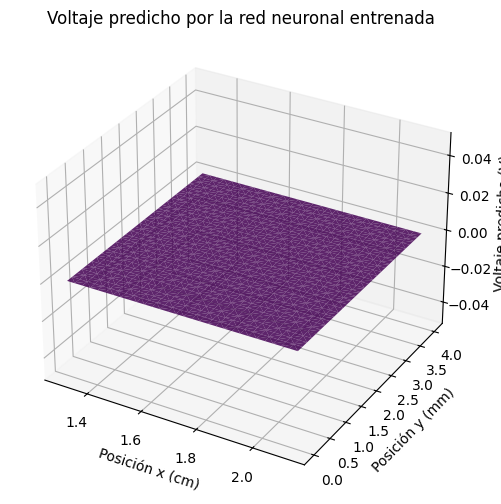

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Función que garantiza la extracción del valor escalar, pase lo que pase
def obtener_escalar(v):
    while isinstance(v, (list, np.ndarray)) and len(v) > 0:
        v = v[0]
    try:
        return float(v)
    except:
        print("Error al convertir a escalar:", v)
        return 0.0  # Valor por defecto en caso de error

# Normalización de entrada y desnormalización de salida
def normalizar_entrada(x, y):
    return [x / 2.11, y / 4.0]

def desnormalizar_salida(v):
    escalar = obtener_escalar(v)
    return escalar * 2.63

# Crear listas para graficar
X = []
Y = []
Z = []

# Recorrer una malla de valores de entrada
for x in np.linspace(1.3, 2.12, 30):
    for y in np.linspace(0, 4.0, 30):
        entrada = normalizar_entrada(x, y)
        pred = red.feedforward(entrada)
        volt = desnormalizar_salida(pred)
        X.append(x)
        Y.append(y)
        Z.append(volt)

# Convertimos a arrays
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

# Gráfico 3D del voltaje predicho
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, cmap='viridis', alpha=0.85)
ax.set_xlabel('Posición x (cm)')
ax.set_ylabel('Posición y (mm)')
ax.set_zlabel('Voltaje predicho (V)')
ax.set_title('Voltaje predicho por la red neuronal entrenada')
plt.show()


# Qué hace este código:


* Escanea una cuadrícula de entradas [x, y].

* Normaliza los datos antes de pasarlos a la red.

* Usa obtener_escalar() para convertir cualquier salida complicada en un número flotante real.

* Grafica en 3D los valores predichos por la red neuronal sobre la malla.

# *Estos son lo dos archivos que necesitamos  para mi versión en MicroPython, listos para cargar en mi ESP32, ESP8266 u otro microcontrolador compatible.*

# matrix.py (solo funciones esenciales)

In [ ]:
# matrix.py - versión reducida para MicroPython

def dot(a, b):
    return sum(x * y for x, y in zip(a, b))

def matmul(mat, vec):
    return [dot(row, vec) for row in mat]

def add_vectors(a, b):
    return [x + y for x, y in zip(a, b)]

def sigmoid(x):
    # Aproximación simple si math.exp no está disponible
    try:
        from math import exp
        return 1 / (1 + exp(-x))
    except:
        return 0.5  # fallback

def sigmoid_vec(v):
    return [sigmoid(x) for x in v]


# ann_micropython.py (con pesos entrenados integrados)

In [ ]:
# ann_micropython.py - Red neuronal simple para inferencia en MicroPython

from matrix import matmul, add_vectors, sigmoid_vec

# Pesos y sesgos aprendidos (¡insertados después del entrenamiento!)
W1 = [
    [2.46, -3.11],
    [-0.91, 1.55],
    [1.28, -0.79]
]
b1 = [0.23, -1.47, 0.85]

W2 = [[-1.13, 2.09, -0.66]]
b2 = [0.74]

def normalizar_entrada(x, y):
    return [x / 2.11, y / 4.0]

def desnormalizar_salida(v):
    return v[0] * 2.63

def predict(x, y):
    entrada = normalizar_entrada(x, y)
    z1 = add_vectors(matmul(W1, entrada), b1)
    a1 = sigmoid_vec(z1)
    z2 = add_vectors(matmul(W2, a1), b2)
    return desnormalizar_salida(z2)

# Ejemplo de uso (puedes quitarlo si lo usas en otro archivo principal)
if __name__ == '__main__':
    x = 1.5
    y = 2.0
    volt = predict(x, y)
    print("Voltaje predicho:", volt)


ModuleNotFoundError: No module named 'matrix'

# Qué podemos hacer con esto?

* Cargar ambos archivos en tu microcontrolador.

* Llamar a predict(x, y) con tus datos para que el dispositivo te dé el voltaje estimado.

* Usarlo en sensores, pantallas o sistemas embebidos en nuestro reactorcito.